In [1]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load Cleaned Dataset

df = pd.read_csv('new_heart_disease_cleaned.csv')
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,494,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,495,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,496,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,497,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [3]:
# Drop index column 

df = df.drop(columns=['Unnamed: 0'], errors='ignore')#unnamed column dropped
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [5]:
#Prepare feature and Target 
x = df.drop(columns=['target'])#your input features (things you use to predict)
y = df['target']#data you want to predict (target/output label)

In [6]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_encoded
0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0
1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0
2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,2
3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,2
4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,2
449,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,2
450,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,2
451,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,2


In [7]:
y

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
448    0.0
449    0.0
450    0.0
451    0.0
452    1.0
Name: target, Length: 453, dtype: float64

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

num_cols = ['age','trestbps','chol','thalach','oldpeak']
scaler = StandardScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])#scaler to the selected numerical columns — this means it calculates the mean and standard deviation of each column.

In [11]:
#Train-Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [12]:
#Check class distribution 
print(y.value_counts())# counts how many times each value appears in the target column y.

#Check class distribution in percentage
print("\n Class Distribution (in %):",y.value_counts(normalize=True)*100)#normalize=True → gives the proportion (not just the count). To check if your dataset is balanced.

target
0.0    238
1.0    215
Name: count, dtype: int64

 Class Distribution (in %): target
0.0    52.538631
1.0    47.461369
Name: proportion, dtype: float64


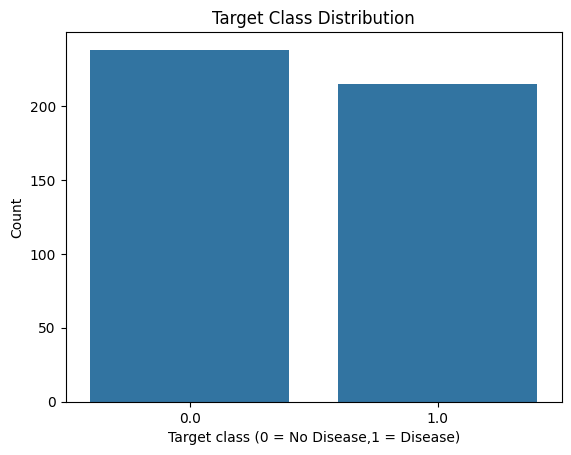

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)#It counts how many times each value appears in y (your target).
plt.title('Target Class Distribution')
plt.xlabel('Target class (0 = No Disease,1 = Disease)')
plt.ylabel('Count')
plt.show()

In [14]:
#Train Models 
log_model = LogisticRegression(max_iter=1000,random_state=42)#max_iter=1000 allows the model more steps to find the best solution and random_state=42 makes results repeatable every time you run the code.
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(n_estimators=150,random_state=42)#It builds 150 decision trees and combines their results for more accurate predictions.

log_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
forest_model.fit(x_train,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
#Predict and accuracy
log_acc=accuracy_score(y_test,log_model.predict(x_test))#predicts outcomes for x_test. Then accuracy_score compares those predictions with the actual values in y_test.
tree_acc=accuracy_score(y_test,tree_model.predict(x_test))
forest_acc=accuracy_score(y_test,forest_model.predict(x_test))

print("Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100}%")
print(f"Decision Tree Accuracy: {tree_acc*100}%")
print(f"Random Forest Accuracy: {forest_acc*100}%")


Model Accuracies:
Logistic Regression Accuracy: 53.84615384615385%
Decision Tree Accuracy: 56.043956043956044%
Random Forest Accuracy: 50.54945054945055%


In [17]:
# User Input for Prediction
print("\n Enter patient details to predict heart disease:")

input_data = {
    'age': float(input("Enter Age: ")),
    'sex': int(input("Enter Sex (1=Male, 0=Female): ")),
    'cp': int(input("Enter Chest Pain Type (0-3): ")),
    'trestbps': float(input("Enter Resting Blood Pressure: ")),
    'chol': float(input("Enter Cholesterol: ")),
    'fbs': int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): ")),
    'restecg': int(input("Resting ECG results (0-2): ")),
    'thalach': float(input("Enter Max Heart Rate Achieved: ")),
    'exang': int(input("Exercise Induced Angina (1=Yes, 0=No): ")),
    'oldpeak': float(input("Enter ST depression: ")),
    'slope': int(input("Slope of ST segment (1-3): ")),
    'ca': int(input("Number of Major Vessels (0-3): ")),
    'thal_encoded': int(input("Thal (0=Fixed, 1=Normal, 2=Reversible): "))
}

# Convert Input to DataFrame
user_df = pd.DataFrame([input_data])

# Predict Using All Models
log_pred = log_model.predict(user_df)[0]#Each model (log_model, tree_model, forest_model) makes a prediction based on the patient’s details
tree_pred = tree_model.predict(user_df)[0]
forest_pred = forest_model.predict(user_df)[0]

# Show Predictions
print(" Model Predictions:")
print("Logistic Regression:", "Heart Disease" if log_pred == 1 else "No Heart Disease")
print("Decision Tree:", "Heart Disease" if tree_pred == 1 else "No Heart Disease")
print("Random Forest:", "Heart Disease" if forest_pred == 1 else "No Heart Disease")


 Enter patient details to predict heart disease:


Enter Age:  30
Enter Sex (1=Male, 0=Female):  0
Enter Chest Pain Type (0-3):  2
Enter Resting Blood Pressure:  122.0
Enter Cholesterol:  148.0
Fasting Blood Sugar > 120 mg/dl (1=True, 0=False):  1
Resting ECG results (0-2):  1
Enter Max Heart Rate Achieved:  156.0
Exercise Induced Angina (1=Yes, 0=No):  1
Enter ST depression:  3.2
Slope of ST segment (1-3):  2
Number of Major Vessels (0-3):  3
Thal (0=Fixed, 1=Normal, 2=Reversible):  1


 Model Predictions:
Logistic Regression: No Heart Disease
Decision Tree: Heart Disease
Random Forest: Heart Disease


 Model Accuracies:
Logistic Regression Accuracy: 53.85%
Decision Tree Accuracy: 56.04%
Random Forest Accuracy: 50.55%

 Confusion Matrix - Logistic Regression:
 [[34  8]
 [34 15]]

 Confusion Matrix - Decision Tree:
 [[27 15]
 [25 24]]

 Confusion Matrix - Random Forest:
 [[30 12]
 [33 16]]


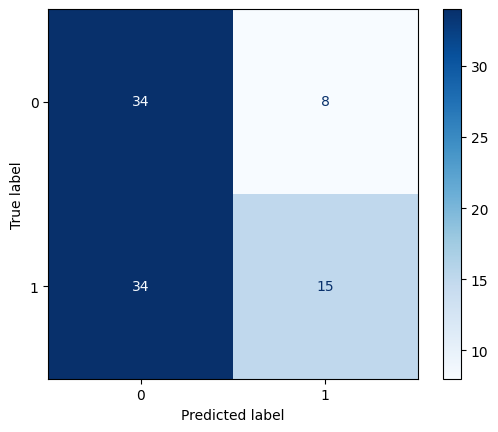

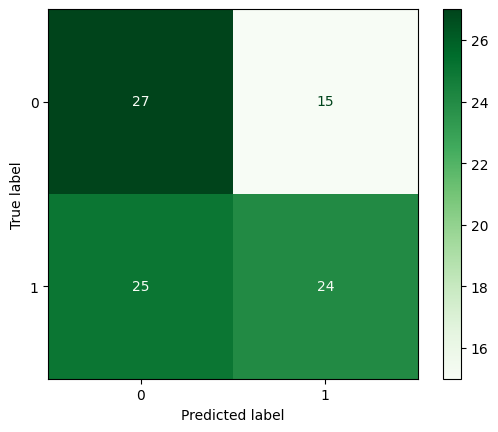

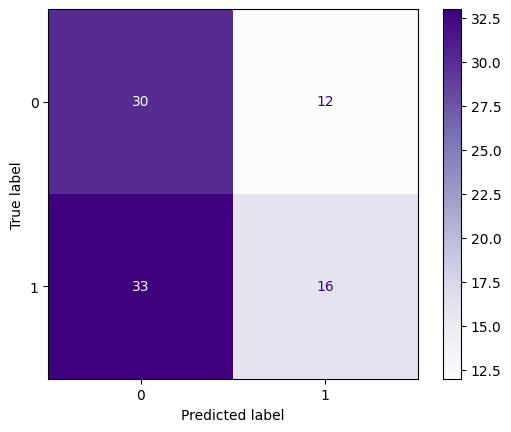

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predict on test data
log_preds = log_model.predict(x_test)#predictions by Logistic Regression
tree_preds = tree_model.predict(x_test)
forest_preds = forest_model.predict(x_test)

# Accuracy Scores
log_acc = accuracy_score(y_test, log_preds)#compare the predicted results with the actual results (y_test) and calculate the accuracy for each model.
tree_acc = accuracy_score(y_test, tree_preds)
forest_acc = accuracy_score(y_test, forest_preds)

# Print Accuracies
print(" Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100:.2f}%")#Prints accuracy as a percentage, nicely formatted to 2 decimal places.
print(f"Decision Tree Accuracy: {tree_acc*100:.2f}%")
print(f"Random Forest Accuracy: {forest_acc*100:.2f}%")

#  Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, log_preds)
print("\n Confusion Matrix - Logistic Regression:\n", cm_log)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1]).plot(cmap='Blues')#hese matrices help you see where the model is making mistakes, not just the overall accuracy.

#  Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, tree_preds)
print("\n Confusion Matrix - Decision Tree:\n", cm_tree)
ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1]).plot(cmap='Greens')

#  Confusion Matrix for Random Forest
cm_forest = confusion_matrix(y_test, forest_preds)
print("\n Confusion Matrix - Random Forest:\n", cm_forest)
ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=[0, 1]).plot(cmap='Purples')

In [20]:
import pickle as pkl


In [21]:
pkl.dump(forest_model,open("HeartDisease.pkl","wb"))